In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
data_path = os.path.abspath('..\databases\csv_file')
data_file = 'ad_clicks.csv'
data_path_file = '\\'.join([data_path, data_file])

In [22]:
df_ads = pd.read_csv(data_path_file)

Knowing the first few rows of the dataset

In [54]:
df_ads.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


Let's see now the columns datatype and check if ad_click_timestamp is the only column that have NaN values

In [59]:
df_ads.dtypes

user_id               object
utm_source            object
day                   object
ad_click_timestamp    object
experimental_group    object
dtype: object

In [66]:
df_ads.isna().sum()

user_id                  0
utm_source               0
day                      0
ad_click_timestamp    1089
experimental_group       0
dtype: int64

hmmmm.... my thoughts were right. Just the column ad_click_timestamp as NaN values. It's because there are many ads that didn't receive a click. So let's push aside for a while and analyse utm_source

Throughtout the columns analysis it've benn possible to identify utm_source as the source of views to each ad.
Now I want to know which ad is performing better (e.g.g which source has obtained more views)

In [39]:
platforms_views = df_ads.groupby('utm_source').user_id.count().\
reset_index()
platforms_views = platforms_views.rename(columns={'user_id': 'views'})
sorted_platforms_views = platforms_views.sort_values(by='views', ascending=False)
sorted_platforms_views

,utm_source,views
2,google,680
1,facebook,504
0,email,255
3,twitter,215


Above I've printed all views received for each platform sorted by the platform who had obtained the better performance

# Wich platform has obtained more Views?

AxesSubplot(0.125,0.125;0.775x0.755)


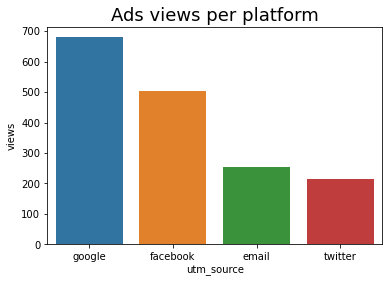

In [52]:
plt.title('Ads views per platform', fontsize=18)
print(sns.barplot(x=sorted_platforms_views['utm_source'], y=sorted_platforms_views['views']))

Now let's explore the other columns of our dataset and try to find out wich platform has a truly better performance. That's because, many views don't, necessarily, tell us whether a platform is getting more conversion in sales or not. So, let's dive in!

In [53]:
df_ads.columns

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group'],
      dtype='object')

The column 'ad_click_time' seems interesting right now. What could we discover with it? Let's check how many ads were clicked.

In [83]:
#Total of rows
total_rows = len(df_ads['ad_click_timestamp'])
tt_clicked = df_ads['ad_click_timestamp'].count()
tt_non_clicked = df_ads[df_ads['ad_click_timestamp'].isna()].user_id.count()
print('Total of rows: ', total_rows )
print('Total of clicked ads: ', tt_clicked )
print('Total of non clicked ads: ', tt_non_clicked)

Total of rows:  1654
Total of clicked ads:  565
Total of non clicked ads:  1089


There are a lot of non clicked ads. I want to find out the difference in percentage

In [84]:
print('Total of clicked ads {0:,.2f}%'.format((tt_clicked/total_rows)*100))
print('Total of non clicked ads {0:,.2f}%'.format((tt_non_clicked/total_rows)*100))

Total of clicked ads 34.16%
Total of non clicked ads 65.84%


Now I'm going to create a new column to store the clicked and non clicked ad. Values will be set as  True or False

In [93]:
df_ads['is_click'] = ~df_ads['ad_click_timestamp'].isnull()

I'll check my new column

In [94]:
df_ads.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


Tomorrow i'll continue to explore this dataset!!!